In [77]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
df_train.shape

(300000, 25)

In [7]:
df_train.dtypes

id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [9]:
df_train.isna().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [10]:
df_train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,149999.500000,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,86602.684716,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,74999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,224999.250000,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,299999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


In [11]:
df_train.describe(include = ['O']) 
#pulls out the objects dtypes attributes and shows their count/frequency/max/quartiles.

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,3,6,6,6,4,222,522,1220,2215,11981,5,6,15,26,192
top,T,Y,Green,Trapezoid,Lion,Russia,Oboe,f7821e391,d173ac7ca,3a114adea,c720f85ca,163cc60fa,Novice,Freezing,g,L,od
freq,153535,191633,127341,101181,101295,101123,92293,2801,1218,534,299,72,126583,99816,36405,19066,5019


- id
- bin 0-4：binary features (e.g.: 0/1, true/false, left/right, y/n)  
- nom : low- 0-4 and high-5-9 cardinality nominal features (e.g.: color, shape, country...)  
- ord : low- 0-4 and high-5 cardinality ordinal features (e.g.: rank，heat...)  
- day month : cyclical features  
- target: 0/1

Now, I want to see what are the entities in each attributes. Using a for loop to read. 

In [12]:
for i in range(5):
    feature = 'bin_' + str(i)
    print(f'{feature} value: {df_train[feature].unique()}')

bin_0 value: [0 1]
bin_1 value: [0 1]
bin_2 value: [0 1]
bin_3 value: ['T' 'F']
bin_4 value: ['Y' 'N']


In [13]:
for i in range(10):
    feature = 'nom_' + str(i)
    print(f'{feature} value: {df_train[feature].unique()}')

nom_0 value: ['Green' 'Blue' 'Red']
nom_1 value: ['Triangle' 'Trapezoid' 'Polygon' 'Square' 'Star' 'Circle']
nom_2 value: ['Snake' 'Hamster' 'Lion' 'Cat' 'Dog' 'Axolotl']
nom_3 value: ['Finland' 'Russia' 'Canada' 'Costa Rica' 'China' 'India']
nom_4 value: ['Bassoon' 'Piano' 'Theremin' 'Oboe']
nom_5 value: ['50f116bcf' 'b3b4d25d0' '3263bdce5' 'f12246592' '5b0f5acd5' '46cab09da'
 'be5592604' '72f8028dc' '4604905e7' 'ad95dc0ee' '2ff007c26' 'a35c346aa'
 'dbfb714a4' 'e1558b071' '39647c92a' 'ee55b9d67' '416a8f3ab' '91bde92fa'
 '3aa9329e2' '568550f04' 'caf83c0b5' '908a1b9c9' 'e844a1f66' 'dbc448931'
 '2979f0d45' '96c73114c' 'b7bb45938' '7da3e4aec' 'be4578201' 'dc07effb0'
 '88917a066' 'f2d59cf51' '5d18641ff' '9347491f2' '475e79160' 'e70a6270d'
 '5b1a9f841' 'e0efe9d20' 'd1b1709e8' '9bb7ea2da' '6fec43dd8' '0dee9b39a'
 '527ded12a' '321bf770e' 'f7821e391' '0de4acd31' '185ba0a59' '4845cc770'
 'bdb9fef4a' '3fef1a765' '2cc9e16b9' 'fd04a970f' '81f9d3312' '30a15b6bd'
 '8dcf8adfb' '83b38aa6b' '74bd42d5f'

 'e05e4c676']


In [14]:
len(list(set(df_train['nom_5'].values)))

222

In [15]:
len(list(set(df_train['nom_6'].values)))

522

In [16]:
len(list(set(df_train['nom_7'].values)))

1220

In [17]:
len(list(set(df_train['nom_8'].values)))

2215

In [18]:
len(list(set(df_train['nom_9'].values)))

11981

We can see high-cardinality in all this columns. The fewer cardinality is 222 values and the highest is 11981 unique values;

In [19]:
for i in range(6):
    feature = 'ord_' + str(i)
    print(f'{feature} value: {df_train[feature].unique()}')

ord_0 value: [2 1 3]
ord_1 value: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 value: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 value: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 value: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 value: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' '

In [20]:
print(f"day value: {list(df_train['day'].unique())}")

day value: [2, 7, 5, 4, 3, 1, 6]


In [21]:
print(f"month value: {list(df_train['month'].unique())}")

month value: [2, 8, 1, 4, 10, 3, 7, 9, 12, 11, 5, 6]


In [22]:
len(list(set(df_train['ord_5'].values)))

192

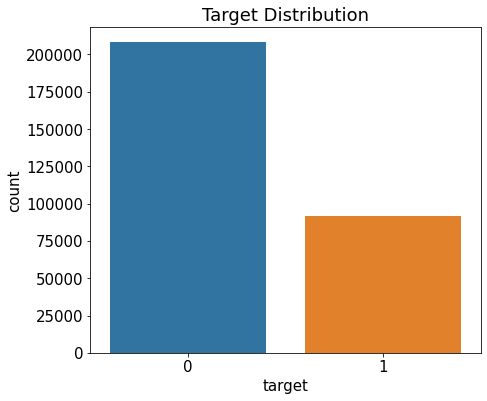

In [25]:
%matplotlib inline

mpl.rc('font', size=15) 
plt.figure(figsize=(7, 6)) 

ax = sns.countplot(x='target', data=df_train)
ax.set(title='Target Distribution');

In [26]:
rectangle = ax.patches[0] # 1st rectangle
print('height:', rectangle.get_height())
print('width:', rectangle.get_width())
print('retangle starting point on x-axis:', rectangle.get_x())

height: 208236
width: 0.8
retangle starting point on x-axis: -0.4


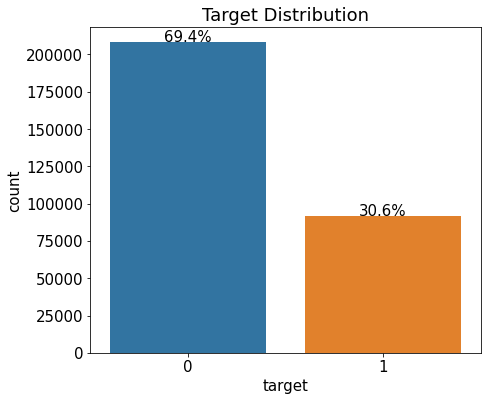

In [27]:
def write_percent(ax, total_size):
    '''get percent for target distribution'''
    for patch in ax.patches:
        height = patch.get_height()     
        width = patch.get_width()      
        left_coord = patch.get_x()      
        percent = height/total_size*100 
        
        # (x, y) position 
        ax.text(x=left_coord + width/2.0,    # x
                y=height + total_size*0.001, # y
                s=f'{percent:1.1f}%',        
                ha='center')                

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=df_train)
write_percent(ax, len(df_train)) # percent
ax.set_title('Target Distribution');

-target 0 with 79.4%

-target 1 with 30.6%

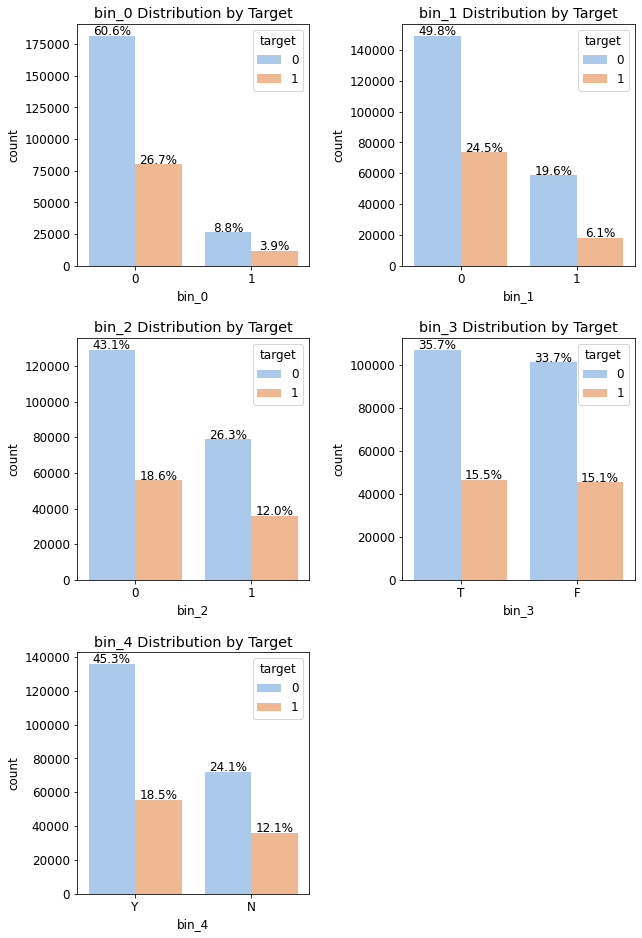

In [28]:
import matplotlib.gridspec as gridspec # display by gridspec

#display in 3 row， 2 column
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) 
plt.figure(figsize=(10, 16))   #setup figsize size
plt.subplots_adjust(wspace=0.4, hspace=0.3) #setup distance between figures

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] 

#get figures
for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    
    # Plot the target value distribution
    sns.countplot(x=feature,
                  data=df_train,
                  hue='target',
                  palette='pastel', # set up color
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # figure title
    write_percent(ax, len(df_train))                  # show %

In [29]:
pd.crosstab(df_train['nom_0'], df_train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [30]:
crosstab = pd.crosstab(df_train['nom_0'], df_train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [31]:
crosstab = crosstab.reset_index() 
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [32]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [33]:
crosstab = get_crosstab(df_train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [34]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [35]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() 
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, 
                        color='black',                 
                        legend=False)                  
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) 
    ax2.set_ylabel('Target 1 Ratio(%)')

In [36]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  
    grid = gridspec.GridSpec(num_rows, num_cols) 
    plt.subplots_adjust(wspace=0.45, hspace=0.3) 
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) 

    
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) 
       
        plot_pointplot(ax, feature, crosstab) 
        
        ax.set_title(f'{feature} Distribution')

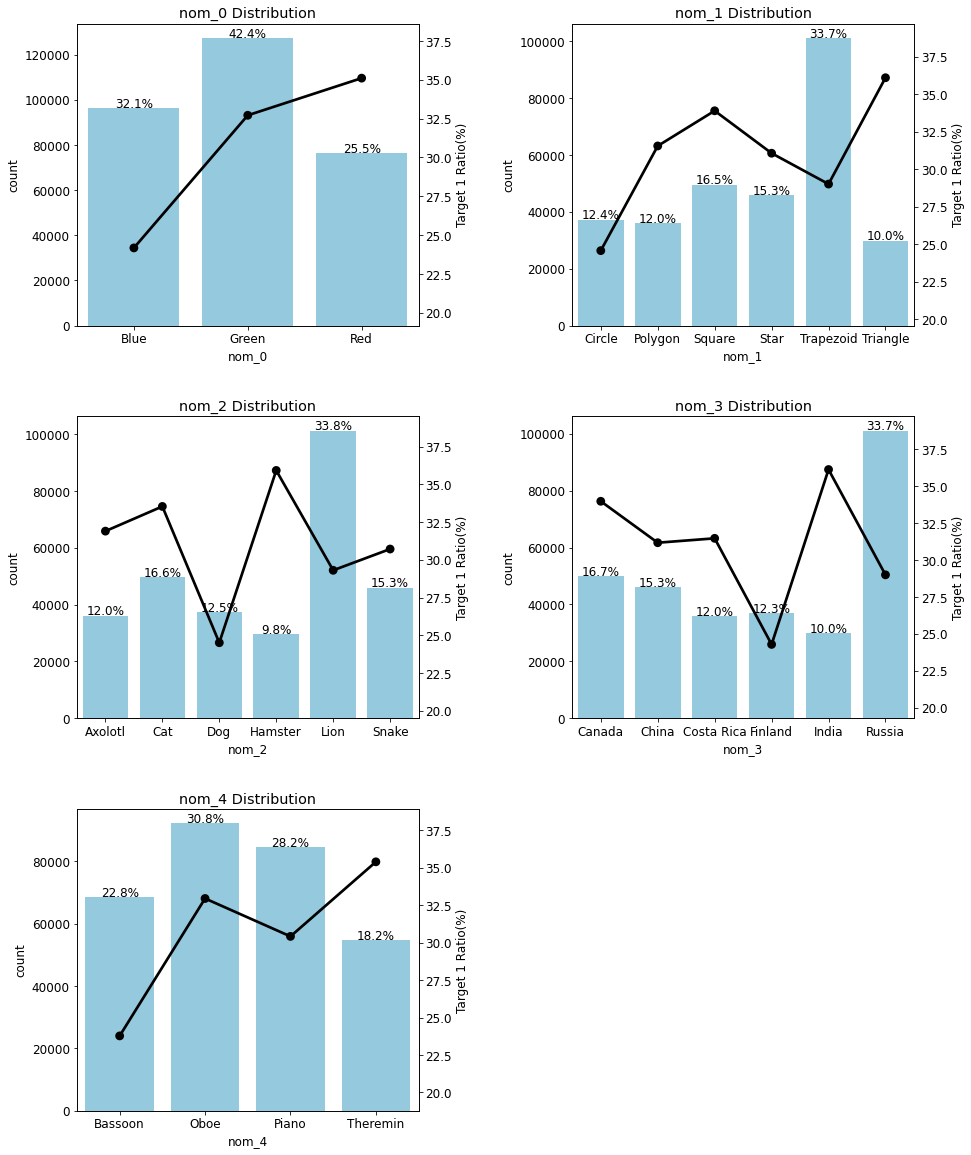

In [37]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] 
plot_cat_dist_with_true_ratio(df_train, nom_features, num_rows=3, num_cols=2)

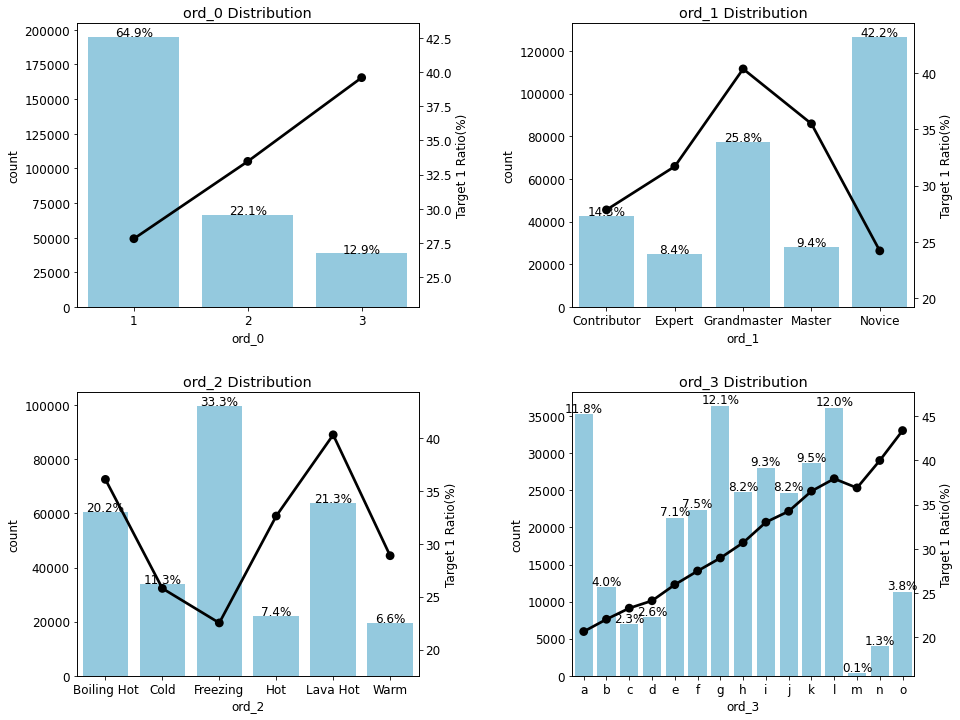

In [38]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] 
plot_cat_dist_with_true_ratio(df_train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [39]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']


ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)


df_train['ord_1'] = df_train['ord_1'].astype(ord_1_dtype)
df_train['ord_2'] = df_train['ord_2'].astype(ord_2_dtype)

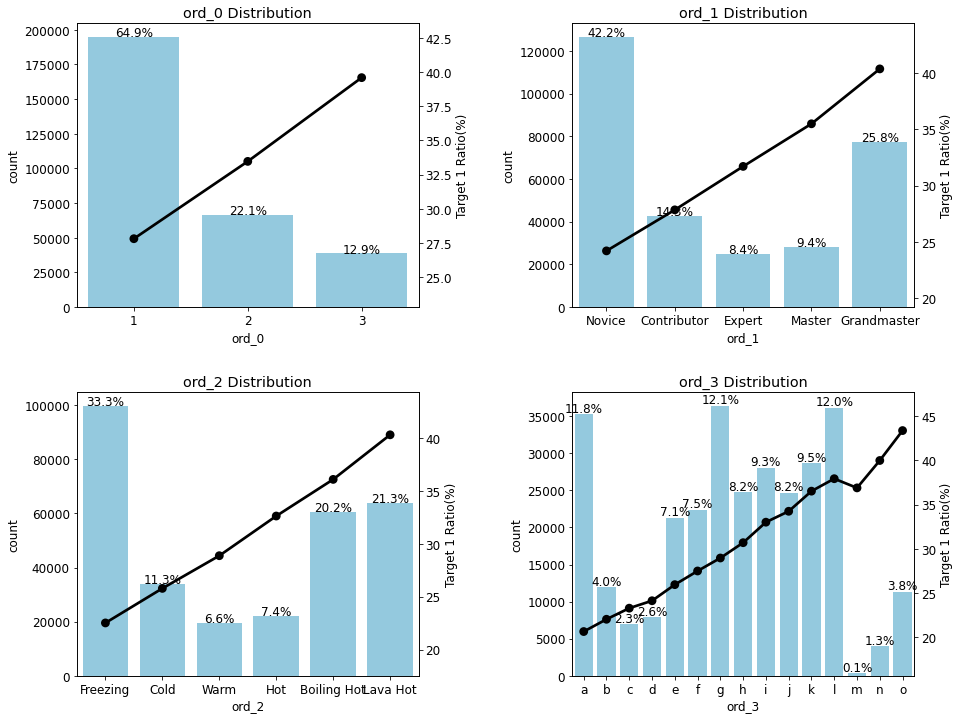

In [40]:
plot_cat_dist_with_true_ratio(df_train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

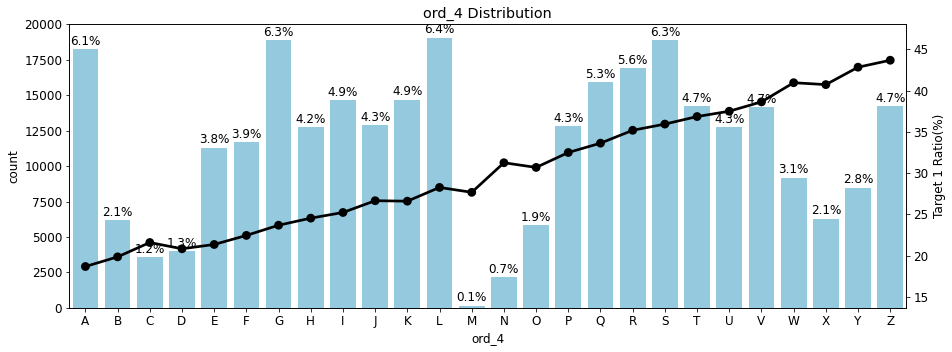

In [47]:
plot_cat_dist_with_true_ratio(df_train, ['ord_4'], 
                              num_rows=2, num_cols=1, size=(15, 12))

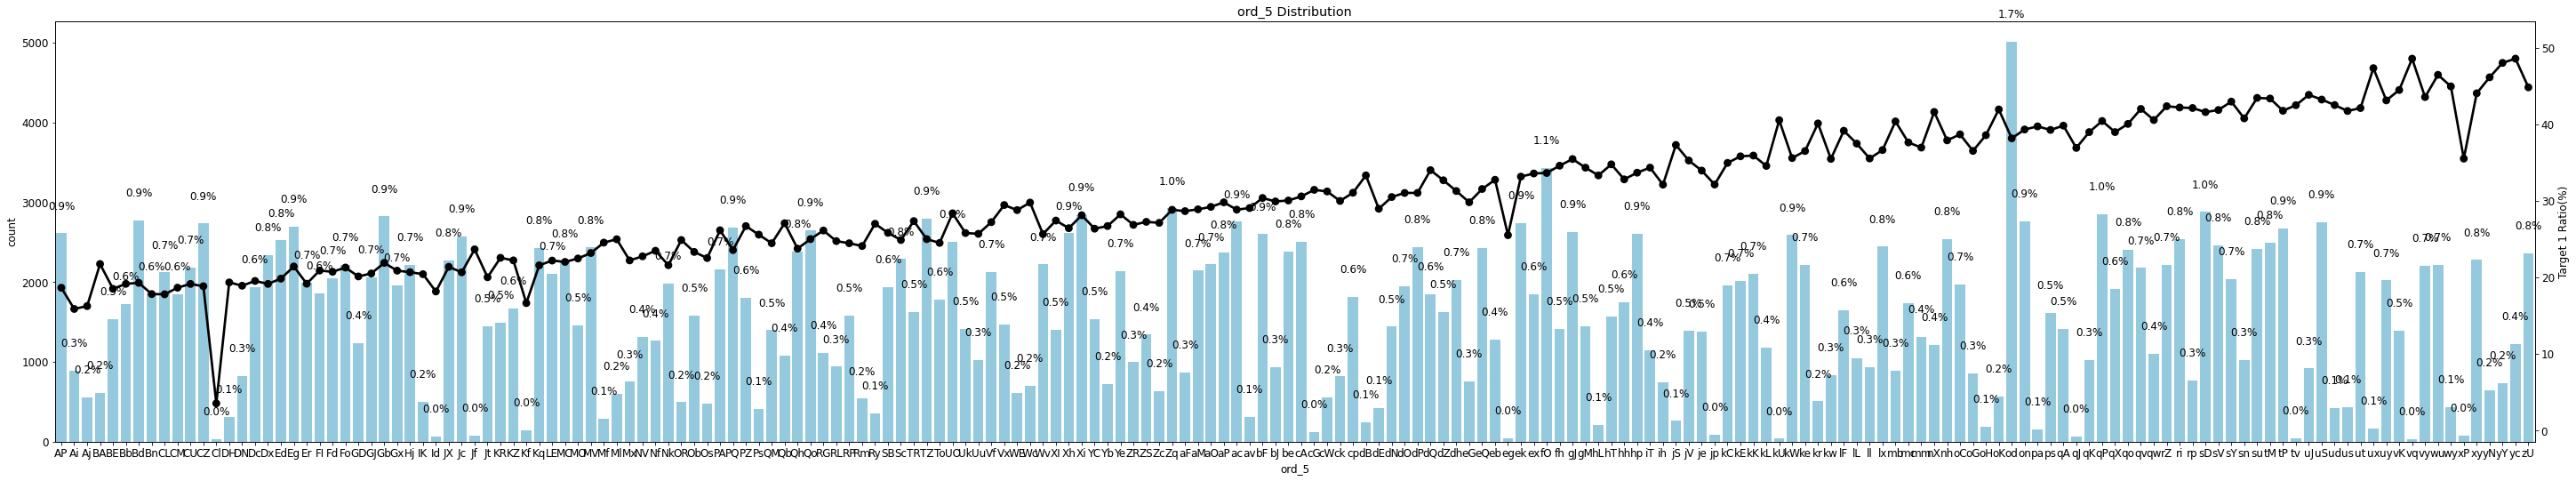

In [42]:
plot_cat_dist_with_true_ratio(df_train, ['ord_5'], 
                              num_rows=2, num_cols=1, size=(50, 20))

In [43]:
ord_5_count = df_train['ord_5'].value_counts().reset_index()['ord_5'].values
ord_5_count

#More details, please look at https://www.kaggle.com/code/kabure/eda-feat-engineering-encode-conquer/notebook#Welcome-to-my-EDA-and-Modeling-kernel-!

array([5019, 3435, 2926, 2880, 2854, 2840, 2824, 2798, 2771, 2764, 2758,
       2757, 2740, 2735, 2700, 2688, 2674, 2654, 2633, 2614, 2613, 2612,
       2603, 2590, 2572, 2543, 2538, 2523, 2510, 2508, 2497, 2467, 2445,
       2438, 2435, 2431, 2430, 2421, 2409, 2389, 2382, 2371, 2360, 2337,
       2289, 2279, 2276, 2268, 2224, 2224, 2221, 2221, 2220, 2219, 2217,
       2206, 2186, 2178, 2159, 2145, 2138, 2127, 2126, 2122, 2110, 2102,
       2060, 2048, 2041, 2029, 2022, 2018, 1990, 1985, 1972, 1962, 1962,
       1952, 1943, 1939, 1916, 1860, 1855, 1852, 1847, 1846, 1812, 1804,
       1782, 1746, 1735, 1731, 1668, 1652, 1627, 1622, 1617, 1585, 1585,
       1567, 1539, 1538, 1497, 1466, 1463, 1452, 1447, 1442, 1419, 1414,
       1411, 1403, 1397, 1396, 1389, 1378, 1342, 1313, 1312, 1285, 1264,
       1236, 1229, 1211, 1183, 1147, 1117, 1102, 1078, 1043, 1026, 1025,
       1023,  997,  941,  934,  932,  919,  894,  893,  865,  854,  834,
        824,  820,  769,  761,  751,  747,  733,  7

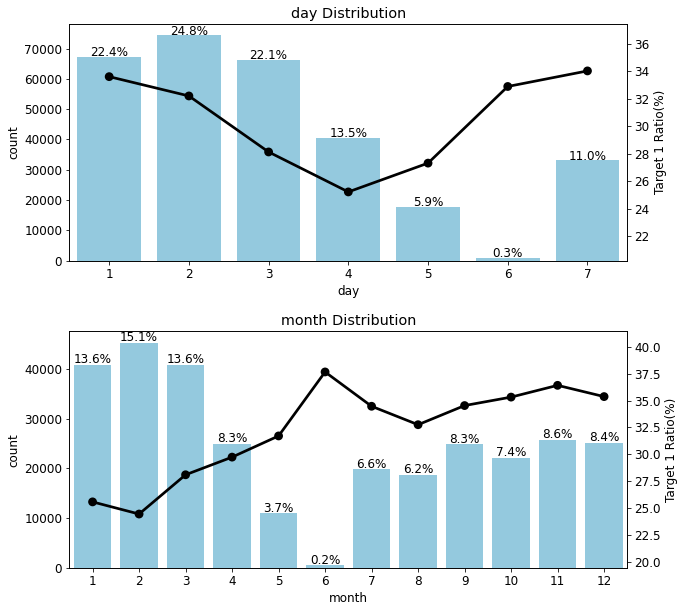

In [48]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(df_train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))

In [49]:
X_train = df_train.drop(["id","target"], axis=1)
y_train = df_train["target"]
y_train = y_train.astype(bool)
X_test = df_test.drop(["id"],axis=1)

X_train.shape

(300000, 24)

#### LightGBM

In [78]:
import lightgbm as LGB  
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from itertools import product

In [51]:
y_train_tmp=df_train['target']

data = pd.concat([df_train.drop('target',axis=1), df_test], axis=0)
data = data.drop(['id', ], axis=1)
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,ord_5_ot
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,Others
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,bF
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,Jc
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,kW
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,qP


In [54]:
train_size=df_train.shape[0]

In [55]:
data.shape

(500000, 24)

In [56]:
# One Hot Encoding

OneHot=OneHotEncoder(drop='first', sparse=True)
OneHot.fit(data)
OH_train_tmp=OneHot.transform(data.iloc[:train_size,:])
OH_test=OneHot.transform(data.iloc[train_size:,:])

In [57]:
OH_train_tmp.shape

(300000, 16555)

In [58]:
# OH_train, OH_val, y_train, y_val = train_test_split(OH_train_tmp, y_train_tmp, test_size=0.05, random_state=9)
OH_train, OH_val, y_train, y_val = train_test_split(OH_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

In [59]:
# Model

lgb_train = LGB.Dataset(OH_train, y_train)  
lgb_eval = LGB.Dataset(OH_val, y_val, reference=lgb_train) 
params = {  
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': 'auc', 
    'max_depth': 2,  
    'learning_rate': 0.3,  
    'feature_fraction': 0.2,
    'is_unbalance': True,  
    'verbose': -1
}  

In [60]:
gbm = LGB.train(params,  
          lgb_train,  
          num_boost_round=10000,  
          valid_sets=[lgb_train, lgb_eval, ],  
          early_stopping_rounds=500,
          verbose_eval=200) 

C:\Users\cui62\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\cui62\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 500 rounds
[200]	training's auc: 0.755472	valid_1's auc: 0.751264
[400]	training's auc: 0.77284	valid_1's auc: 0.764903
[600]	training's auc: 0.782611	valid_1's auc: 0.771241
[800]	training's auc: 0.789714	valid_1's auc: 0.7751
[1000]	training's auc: 0.795345	valid_1's auc: 0.778274
[1200]	training's auc: 0.800061	valid_1's auc: 0.780601
[1400]	training's auc: 0.804033	valid_1's auc: 0.782085
[1600]	training's auc: 0.807465	valid_1's auc: 0.78337
[1800]	training's auc: 0.810489	valid_1's auc: 0.784556
[2000]	training's auc: 0.813292	valid_1's auc: 0.785533
[2200]	training's auc: 0.81579	valid_1's auc: 0.78636
[2400]	training's auc: 0.818118	valid_1's auc: 0.787403
[2600]	training's auc: 0.820262	valid_1's auc: 0.787734
[2800]	training's auc: 0.822271	valid_1's auc: 0.788226
[3000]	training's auc: 0.824057	valid_1's auc: 0.788584
[3200]	training's auc: 0.825712	valid_1's auc: 0.789148
[3400]	training's auc: 0.827282	valid_1's auc: 0.789

In [61]:
y_train_pred_lgb=gbm.predict(OH_train, num_iteration=gbm.best_iteration)
y_val_pred_lgb=gbm.predict(OH_val, num_iteration=gbm.best_iteration)
print("Training auc : ", roc_auc_score(y_train, y_train_pred_lgb))
print("Val auc : ", roc_auc_score(y_val, y_val_pred_lgb))

Training auc :  0.847799055431404
Val auc :  0.7924375559314709


In [62]:
y_test_pred_lgb=gbm.predict(OH_test, num_iteration=gbm.best_iteration) 

In [63]:
y_test_pred = y_test_pred_lgb
submission=pd.DataFrame({'id': np.arange(300000, 500000,1), 'target':y_test_pred})
submission.head()
# submission.to_csv('submission.csv', index=False)

,id,target
0,300000,0.482287
1,300001,0.869577
2,300002,0.174484
3,300003,0.552920
4,300004,0.919837


#### Logistics Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

In [81]:
X=df_train.drop(['id','target'],axis=1)
y=df_train['target']
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [84]:
one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

In [85]:
train

<300000x16487 sparse matrix of type '<class 'numpy.float64'>'
	with 7200000 stored elements in Compressed Sparse Row format>

In [88]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    lr=LogisticRegression(solver='lbfgs', max_iter=1000)
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))

In [ ]:
logistic(train,y)